# HYPOTHESIS TESTING

## Chi Square Test

Chi Square Test Generally used to find if there is any relationship between two categorical variables

* Step 1 : Import Libarary and Load Dataset

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [107]:
df = sns.load_dataset('tips')

In [108]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Step 2 :  Create Obeserved value table 

In [109]:
category_tab = pd.crosstab(df['sex'],df['smoker'])
category_tab

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [110]:
print("Obeserved Value : \n")
Observed_val = category_tab.values
print(Observed_val)

Obeserved Value : 

[[60 97]
 [33 54]]


* Step 3 : Create Expected Value Table

In [111]:
val = stats.chi2_contingency(category_tab)

In [112]:
val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [113]:
Expected_value = val[3]
Expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

* Step 4 : Calculate Degree of Freedom

In [114]:
row = category_tab.iloc[:,0]
row

sex
Male      60
Female    33
Name: Yes, dtype: int64

In [115]:
col = category_tab.iloc[0,:]
col

smoker
Yes    60
No     97
Name: Male, dtype: int64

In [116]:
no_of_rows = len(row)
no_of_rows

2

In [117]:
no_of_column = len(col)
no_of_column

2

In [118]:
# Degree of Freedom
ddof = (no_of_rows-1)*(no_of_column-1)
print("Degree of Freedom : ",ddof)

Degree of Freedom :  1


In [119]:
# Critical Value
alpha = 0.05

In [120]:
o = Observed_val
e = Expected_value

In [121]:
from scipy.stats import chi2
chi_square = sum(((o-e)**2)/e)
chi_square

array([0.00119737, 0.00073745])

In [122]:
chi_square_stat = chi_square[0] + chi_square[1]
print("Chi-Square Statistics :",chi_square_stat)

Chi-Square Statistics : 0.001934818536627623


In [123]:
critical_value = chi2.ppf(q=1-alpha,df=ddof)
print("critical_value : ",critical_value)

critical_value :  3.841458820694124


In [124]:
p_val = 1-chi2.cdf(x=chi_square_stat,df=ddof)
print("P-value : ",p_val)

P-value :  0.964915107315732


In [125]:
print("P-value : ",p_val)
print("Significant level : ",alpha)
print("Degree of Freedom : ",ddof)

P-value :  0.964915107315732
Significant level :  0.05
Degree of Freedom :  1


In [126]:
# since, genrerally in H0 we don't assume anything
# H0 --> There is no relation 
# H1 --> There is a relation

In [127]:
if chi_square_stat <= critical_value:
    print("Retain H0 ,There is no relationship between 2 categorical variables")
else:
    print("Reject H0 ,There is a relationship between 2 categorical variables")

Retain H0 ,There is no relationship between 2 categorical variables


In [128]:
if alpha <= p_val:
    print("Retain H0 ,There is no relationship between 2 categorical variables")
else:
    print("Reject H0 ,There is a relationship between 2 categorical variables")

Retain H0 ,There is no relationship between 2 categorical variables


## T Test

T-test genre

- type of inferential statisitcs 
- Used to check if there is any difference between mean of two groups ( sample and population )

##### One Sample T-test 


- the t-test is used when population standard deviation is unknown (hence it is estimated from the sample)
- To prove : the mean of sample is (nearly) equal to population mean 
- The null hypothesis (H0) for a t-test typically assumes that there is no significant difference between the means of the two groups or conditions being compared. In other words, H0 states that the population means are equal. 


In [129]:
data = pd.DataFrame({'ages':[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]})

In [130]:
data.head()

,ages
0,10
1,20
2,35
3,50
4,28


In [131]:
data['ages'].mean()

30.34375

In [132]:
sample = np.random.choice(data['ages'],10)
sample

array([20, 25, 35, 20, 19, 14, 32, 30, 50, 23], dtype=int64)

In [133]:
sample.mean()

26.8

In [134]:
sampled = pd.DataFrame(sample)

<Axes: ylabel='Frequency'>

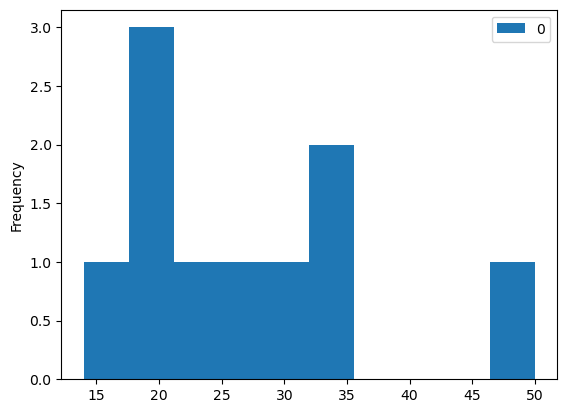

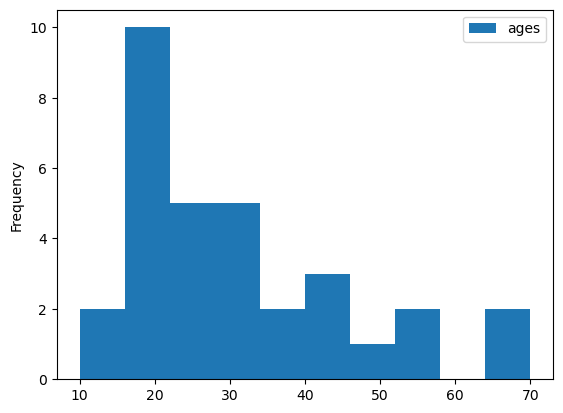

In [135]:
sampled.plot(kind='hist')
data.plot(kind='hist')

In [136]:
# Distribution of both population and sample seems to be similar

In [137]:
from scipy.stats import ttest_1samp

In [138]:
tstats,p_value = ttest_1samp(sample,popmean=30.34375)

In [139]:
print(p_value)

0.3102480412293537


- H0 same population and sample mean
- H1 different population and sample mean

In [140]:
if p_val <  0.05:
    print("we are rejecting nul hypothesis.so Means are not equal")
else:
    print("We fail to reject null hypothesis.so Means are equal")

We fail to reject null hypothesis.so Means are equal


##### Paired-sample T-Test (dependant/related)

- If we want to check how different the sample from same group are (before and after some test), we can go for paired T-test
- population mean and std is not given (only samples are given)
- it compares two samples mean of same group
- Example - Drinkers drinking frequency - before breakup and after breakup

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [166]:
weight1 = [25,26,28,29,30,31,33,35,36,35,34,28,29,27,45]
weight2 = weight1+stats.norm.rvs(scale=5,loc=1.25,size=15)

In [167]:
print(weight1)
print(weight2)

[25, 26, 28, 29, 30, 31, 33, 35, 36, 35, 34, 28, 29, 27, 45]
[27.0768034  30.13139882 35.00275493 28.07808696 23.22712826 31.98303942
 31.87887409 34.86823034 32.97501386 32.66406635 32.92220058 26.80937484
 28.48641809 24.87943069 39.34008471]


In [1]:
# Weights of People before taking the pills and after taking the pills

In [168]:
weight_df = pd.DataFrame({'weight1':weight1,'weight2':weight2,'weightChnage':weight1-weight2})
weight_df

,weight1,weight2,weightChnage
0,25,27.076803,-2.076803
1,26,30.131399,-4.131399
2,28,35.002755,-7.002755
3,29,28.078087,0.921913
4,30,23.227128,6.772872
5,31,31.983039,-0.983039
6,33,31.878874,1.121126
7,35,34.868230,0.131770
8,36,32.975014,3.024986
9,35,32.664066,2.335934


<Axes: ylabel='Frequency'>

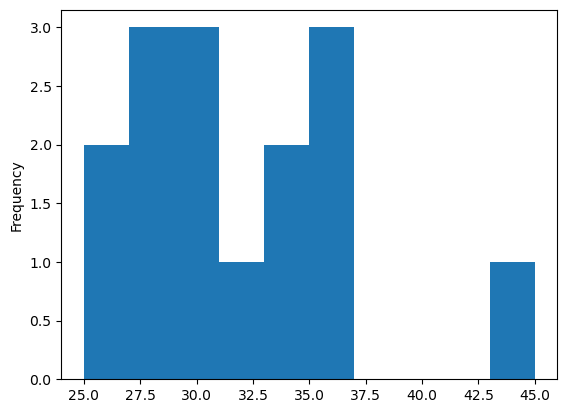

In [169]:
weight_df['weight1'].plot(kind='hist')

<Axes: ylabel='Frequency'>

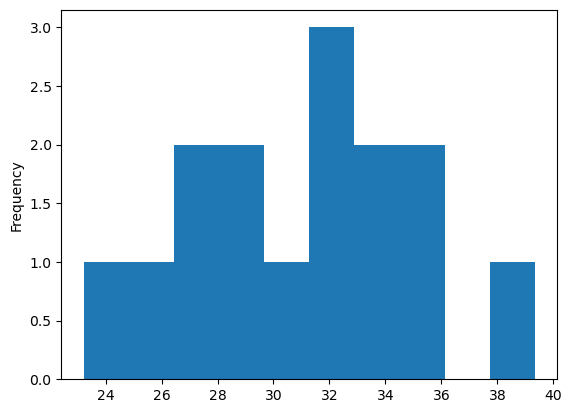

In [170]:
weight_df['weight2'].plot(kind='hist')

<Axes: ylabel='Count'>

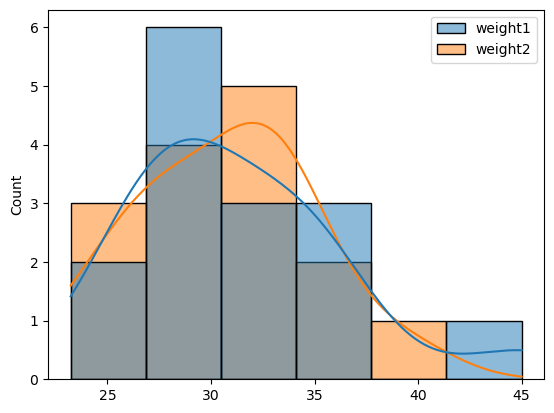

In [171]:
sns.histplot(weight_df[['weight1','weight2']],kde=True)

In [162]:
# The Distribution shows that the means are nearly same (since the distribution of data is same)

In [172]:
tstat,p_value = stats.ttest_rel(weight1,weight2) # rel --> indicatest 'related sample test'
print(p_value)

0.43641846613939017


In [173]:
if p_value <  0.05:
    print("we are rejecting nul hypothesis,so Means are not equal")
else:
    print("We fail to reject null hypothesis,so Means are equal")

We fail to reject null hypothesis,so Means are equal


##### Two-Sample T-Test (independant/unrelated)

- A two-sample t-test, also known as an independent t-test, is used to compare the means of two separate and independent groups. These groups are not paired or connected in any way.
- It evaluates whether there is a statistically significant difference between the means of the two independent groups.
- Assumptions for a two-sample t-test include that the data in each group is normally distributed, the variances in the two groups are approximately equal (homoscedasticity), and the observations within each group are independent.
- Example - Group wich took medecine and Group Which didn't took medecine

In [ ]:
# Perfroms simialr task as Paired but on Independant samples 
# Also, here we perfrom independant t-test 
# t_stat,p_val = stats.ttest_ind(data[...],data[...]) # ind --> indicatest 'independant sample test'

#### Tailed Tests

##### 1. One Tailed-T Test

- A one-tailed t-test is a specific case of a one-sample t-test where you are only interested in one direction of the difference between the sample mean and the population mean.
- If your alternative hypothesis is specified as the sample mean being either greater than or less than the population mean (but not both), you are conducting a one-tailed t-test.
- For example, if Ha is "μ < μ0," it's a left-tailed (negative) one-tailed t-test. If Ha is "μ > μ0," it's a right-tailed (positive) one-tailed t-test.

##### 2. Two Tailed-T Test

- A Two Tailed T-Test can be One Sample T-Test ( i.e mean of sample and population) or Two Sample T-Test(i.e mean of Two differnet samples)
- Null Hypothesis (H0): The sample mean is equal to the population mean (μ = μ0).
- Alternative Hypothesis (Ha): The sample mean is not equal to the population mean (μ ≠ μ0).

## Anova Test (F-Test)

- ANOVA is a statistical test used to determine whether there are statistically significant differences among the means of three or more groups or categories.

* One-Way vs. Two-Way ANOVA:
  - In a one-way ANOVA, you compare the means of multiple groups based on one categorical independent variable (e.g., comparing the means of different types of fertilizer on plant growth).
  - In a two-way ANOVA, you consider the effects of two independent variables simultaneously (e.g., comparing the effects of both fertilizer type and sunlight exposure on plant growth).
  -

* Assumptions of ANOVA:

  - Independence: Data within each group should be independent.
  - Normality: The data within each group should follow a roughly normal distribution.
  - Homoscedasticity: The variances within each group should be approximately equal.
  -
* Null and Alternative Hypotheses:

  - Null Hypothesis (H0): There are no significant differences in means among the groups.
  - Alternative Hypothesis (Ha): At least one group mean is significantly different from the others.
  -

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [29]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


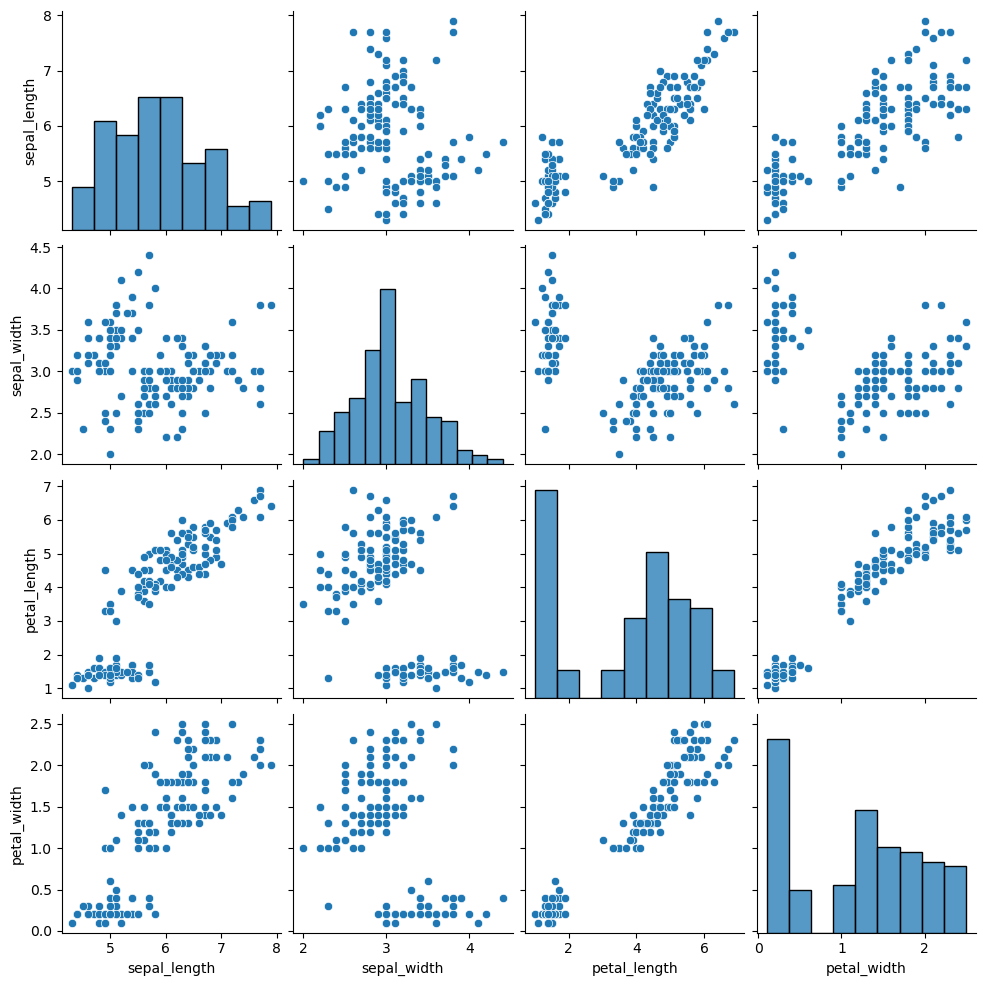

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

C:\Users\ankus\AppData\Local\Temp\ipykernel_10776\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [32]:
# the histogram shows distribution while the scatter plot shows correlation
# from both table and graph we can see correlation between petal length and petal width

In [33]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
setosa = df[df['species']=='setosa']
setosa.reset_index(inplace=True)
setosa.drop('index',inplace=True,axis=1)
setosa.head(5)

C:\Users\ankus\AppData\Local\Temp\ipykernel_10776\150319049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa.drop('index',inplace=True,axis=1)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
versicolor = df[df['species']=='versicolor']
versicolor.reset_index(inplace=True)
versicolor.drop('index',inplace=True,axis=1)
versicolor.head(5)

C:\Users\ankus\AppData\Local\Temp\ipykernel_10776\95159041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor.drop('index',inplace=True,axis=1)


,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [51]:
virginica = df[df['species']=='virginica']
virginica.reset_index(inplace=True)
virginica.drop('index',inplace=True,axis=1)
virginica.head(5)

C:\Users\ankus\AppData\Local\Temp\ipykernel_10776\1123733683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginica.drop('index',inplace=True,axis=1)


,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,virginica
1,5.8,2.7,5.1,1.9,virginica
2,7.1,3.0,5.9,2.1,virginica
3,6.3,2.9,5.6,1.8,virginica
4,6.5,3.0,5.8,2.2,virginica


In [52]:
petal_wid = pd.DataFrame({"setosa":setosa['sepal_width'],"versicolor":versicolor['sepal_width'],"virginica":virginica['sepal_width']})
petal_wid

,setosa,versicolor,virginica
0,3.5,3.2,3.3
1,3.0,3.2,2.7
2,3.2,3.1,3.0
3,3.1,2.3,2.9
4,3.6,2.8,3.0
5,3.9,2.8,3.0
6,3.4,3.3,2.5
7,3.4,2.4,2.9
8,2.9,2.9,2.5
9,3.1,2.7,3.6


<Axes: ylabel='Count'>

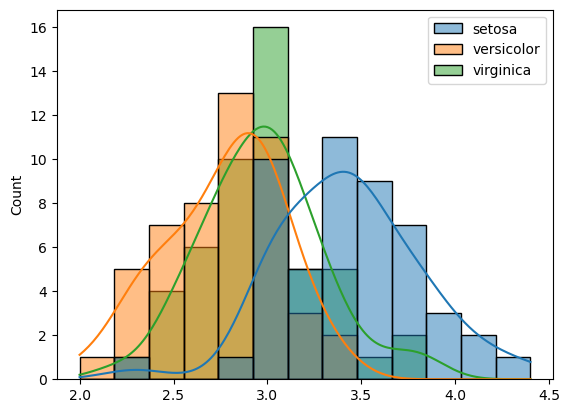

In [59]:
sns.histplot(petal_wid,kde=True)

In [53]:
petal_wid.columns

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [65]:
test_stat,p_value = stats.f_oneway(petal_wid['setosa'],petal_wid['versicolor'],petal_wid['virginica'])

In [66]:
print("P-Value is : ",p_value)

P-Value is :  4.492017133309115e-17


In [68]:
if p_value < 0.05:
    print("reject null hypothesis, i.e. the means are different ")
else:
    print("do not reject null hypothesis, i.e. the means are same ")

reject null hypothesis, i.e. the means are different 


## Z-test

* Sample Size:

  - Z-Test: It's typically used when the sample size is large (usually n > 30) because, with a large sample, the sample mean tends to follow a normal distribution due to the Central Limit Theorem.
  - T-Test: It's appropriate when dealing with smaller sample sizes (typically n < 30) or when the population standard deviation is unknown. The t-distribution accounts for the added uncertainty when working with smaller samples.
  -

* Hypothesis Testing:

  - Both z-tests and t-tests can be used for hypothesis testing, such as comparing sample means to population means, testing for differences between groups, or assessing the effect of an intervention.
  -
  

In [70]:
# imports
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
# Generate a random array of 50 numbers having mean 110 and sd 15

mean_iq = 110
sd_iq = 15/math.sqrt(50)
alpha =0.05
null_mean =100
data = sd_iq*randn(50)+mean_iq

In [72]:
# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis
